In [2]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Machine Learning Engineer Nanodegree
## Capstone Project
### Airbnb New  User Booking Dataset
Rohan Verma  
June 19th, 2017


## I. Problem Definition
_____

### Project Overview

Airbnb, which is an online marketplace where people list, discover, and book accomodations around the world. It has collected various datapoints about users. This data about the usage patterns of its present user base can be utilized to predict patterns about its future users to provide them with customized suggestions to serve Airbnb's customers better. Airbnb had posted this on Kaggle as a Recruitment Challenge. Using user
data effectively can help organizations increase metrics such as sales, user experience, customer retention and customer satisfaction. Machine Learning techniques can help organizations attain useful predictions using these data. The motivation for pursuing this project is to understand how to work on real world datasets and challenges that companies like Airbnb consider to be important and valuable for their companies and learn to provide similar value for organizations that I work with in the future.

#### Problem Statement

By accurately predicting where a new user will book their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

Using the data from [Airbnb New User Bookings](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings) dataset, the challenge is to predict the destination of choice for the users' first booking. This data includes demographics of users and their session data. The model will utilize these demographics and session data to make models that can predict the destinations.

In this project, I plan to use Machine Learning Techniques to predict in which country a new user will make their first booking on Airbnb. This project will involve data cleaning, data exploration using visualizations, and testing various algorithms for classification for the same.

#### Datasets and Inputs

The dataset is composed of 5 CSV files. It has been obtained from a Kaggle Competition provided by Airbnb. [[link]](https://www.kaggle.com/c/airbnb-recruiting-new-user-bookings/data)

The most important file is the `train_users` file which has 16 columns containing user id, dates of account creation, first booking date, gender, age, signup method, signup app, destination etc along with the target variable `country_destination` and has 213451 rows. The `test_users` is similar to the previous file discussed but does not have our target variable and we have to use these to predict the destination and has 62096 rows. We have a good amount of data to work with to produce meaningful models.

The other three files contain web session logs (`sessions.csv`) for the users, summary statistics of destination countries (`countries`) and summary statistics of about the users age group, gender, etc. (`age_gender_bkts.csv`)

##### File descriptions

- **train_users.csv** - the training set of users
- **test_users.csv** - the test set of users
    - id: user id
    - date_account_created: the date of account creation
    - timestamp_first_active: timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
    - date_first_booking: date of first booking
    - gender
    - age
    - signup_method
    - signup_flow: the page a user came to signup up from
    - language: international language preference
    - affiliate_channel: what kind of paid marketing
    - affiliate_provider: where the marketing is e.g. google, craigslist, other
    - first_affiliate_tracked: whats the first marketing the user interacted with before the signing up
    - signup_app
    - first_device_type
    - first_browser
    - country_destination: this is the target variable you are to predict
- **sessions.csv** - web sessions log for users
    - user_id: to be joined with the column 'id' in users table
    - action
    - action_type
    - action_detail
    - device_type
    - secs_elapsed
- **countries.csv** - summary statistics of destination countries in this dataset and their locations
- **age_gender_bkts.csv** - summary statistics of users' age group, gender, country of destination


### Evaluation Metrics

This is a multi-class classification problem, several evaluation methods can be used for this given ML model valuation.

Since this is a Kaggle Challenge, we already have an evaluation metric, that is the NDCG (Normalized Discounted Cumulative Gain)

For each new user, we are to make a maximum of 5 predictions on the country of the first booking. The ground truth country is marked with relevance = 1, while the rest have relevance = 0.

$DCG_k=\sum_{i=1}^k\frac{2^{rel_i}-1}{\log_2{\left(i+1\right)}}$

$nDCG_k=\frac{DCG_k}{IDCG_k}$

where $rel_i$ is the relevance of the result at position $i$ and $k = 5$.

For example, if for a particular user the destination is FR, then the predictions become:

[ FR ] gives a $NDCG=\frac{2^{1}-1}{log_{2}(1+1)}=1.0$

[ US, FR ] gives a $DCG=\frac{2^{0}-1}{log_{2}(1+1)}+\frac{2^{1}-1}{log_{2}(2+1)}=\frac{1}{1.58496}=0.6309$

This metric has been implemented in the python notebook.


## II. Analysis
_____

### Data Exploration

The train users data file has 213451 rows, where each rows describes 15 features about the user. The target variable is `country_destination`. Before starting, it was important to find out the percentage of missing values. It was found that `date_first_booking` not available for the testing dataset. Also, I infered that date_first_booking is only available for users who successfully booked a destination and since `NDF` is the most frequent, it is implicit that `date_first_booking` would be missing. So, I decided to drop this feature.

Here, we see the percentage of data missing in the dataset files:

Percentage of missing data by column in train_users.csv
id                          0.000000
date_account_created        0.000000
timestamp_first_active      0.000000
date_first_booking         67.733998
gender                      0.000000
age                        42.412365
signup_method               0.000000
signup_flow                 0.000000
language                    0.000000
affiliate_channel           0.000000
affiliate_provider          0.000000
first_affiliate_tracked     2.208335
signup_app                  0.000000
first_device_type           0.000000
first_browser               0.000000
dtype: float64

Percentage of missing data by column in test_users.csv
id                           0.000000
date_account_created         0.000000
timestamp_first_active       0.000000
date_first_booking         100.000000
gender                       0.000000
age                         46.502190
signup_method                0.000000
signup_flow                  0.000000
language                     0.000000
affiliate_channel            0.000000
affiliate_provider           0.000000
first_affiliate_tracked      0.032208
signup_app                   0.000000
first_device_type            0.000000
first_browser                0.000000
dtype: float64

The plot below shows the frequency of the target variable. There are 12 possible outcomes of the destination country: 'US', 'FR', 'CA', 'GB', 'ES', 'IT', 'PT', 'NL','DE', 'AU', 'NDF' (no destination found), and 'other'. Please note that 'NDF' is different from 'other' because 'other' means there was a booking, but is to a country not included in the list, while 'NDF' means there wasn't a booking.

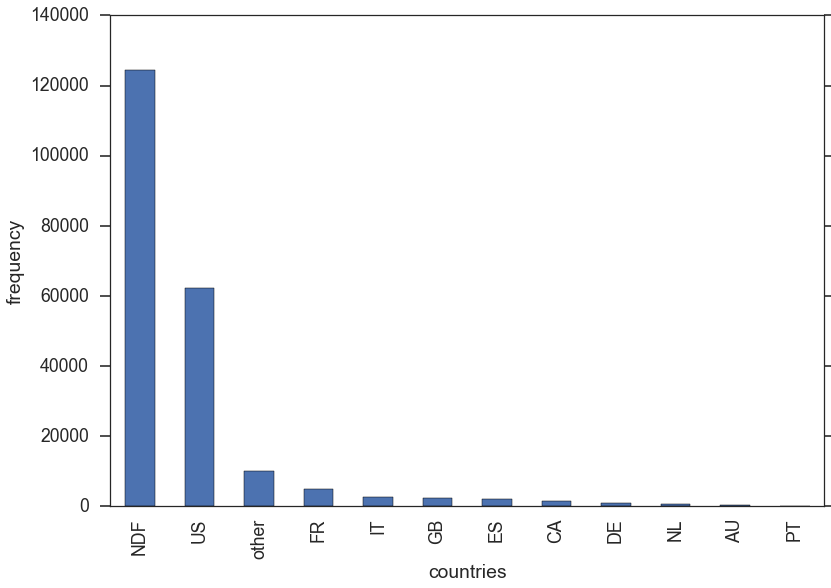

In [7]:
target.value_counts().plot(kind='bar').set(xlabel='countries', ylabel='frequency')

After solving the `date_first_booking` feature, we explored the gender data. It was found that most of the data was not filled by the user and was set as `-unknown-` in the dataset. 

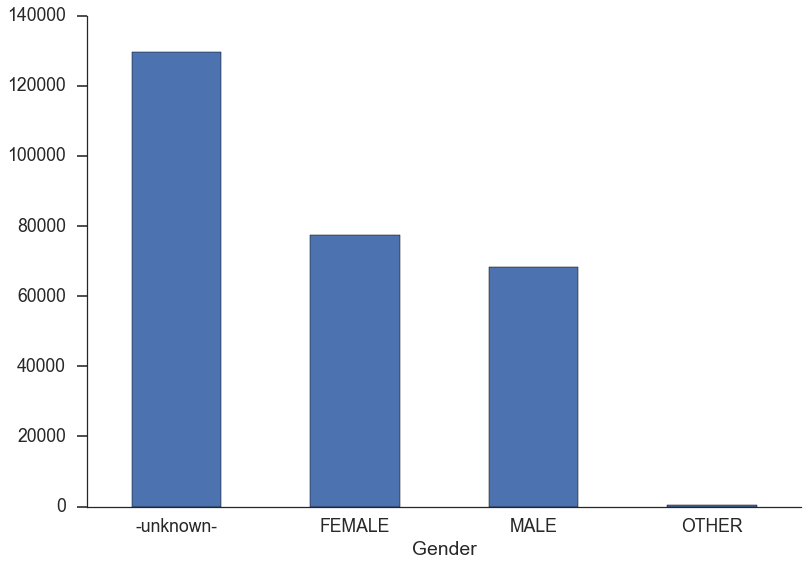

In [6]:
users.gender.value_counts(dropna=False).plot(kind='bar', rot=0)
plt.xlabel('Gender')
sns.despine()

Then, it was found that the Age was also having erroneous values such as `2014`, and negative values etc, I decided to set values `< 15` and `> 100` as `NaN`. The visualization is displayed below:

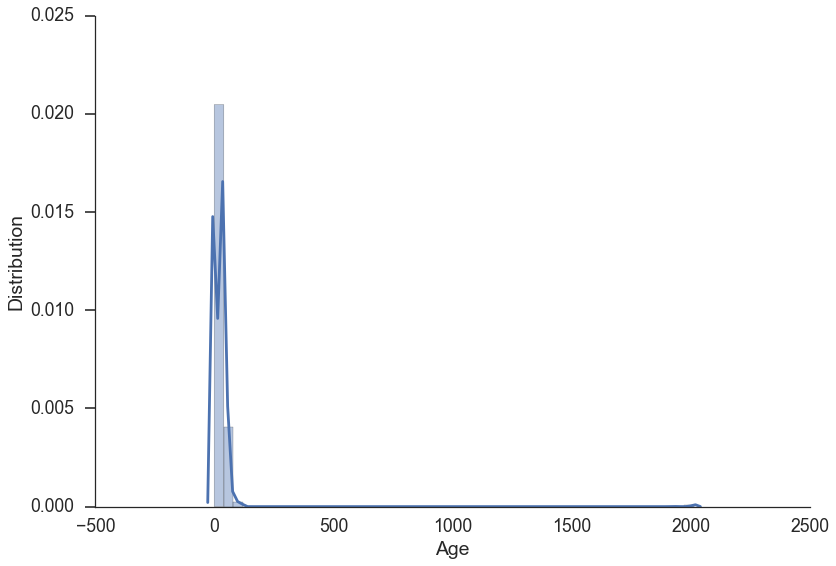

In [11]:
sns.distplot(users.age.dropna())
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.despine()

Now, the mean of the age was 36.05.

### Algorithms and Techniques

Given that this problem was a multi-class supervised classification problem, we decided to use Decision Trees. Decision trees are powerful in predicting a target by learning simle decision rules learnt using training data. They can handle numerical and categorical data, missing data, along with multiple target classes. 

Although decision trees are good, I decided to use ensemble methods to improve the predictive power. These algorithms were, the random forest classifier and XGBoost. 

**Random Forest** Classifier fits number of decision trees on subsamples of a dataset and averages the results. 

A random forest is a collection of random decision trees. In which at each node you will randomly draw a subset of features and the decision tree will predict the classification. Then the same is done with several trees and bagged. This ensemble method will reduce overfitting and provide good classification. The bias-variance trade-off for this algorithm is good and therefore the possibility of overfitting is drastically reduced.

**GridSearchCV** There are many parameters which can be tuned to get a model with very good accuracy. The grid search technique helps us to generate a grid from parameters and use these multiple combinations of parameters and then select the best one which provides best cross-validation results. Although, it is important to note here that the grid search technique only performs hyper-parameter tuning, i.e. the parameters that are not directly learnt within the estimator.
In scikit-learn, we have GridSearchCV which uses an estimator and a set of hyper-parameters to exhaustively generates candidates from set and generate a validation score and we can then obtain the most optimal parameters systematically. We use this technique to get the best hyperparameters for our Random Forest ensemble.

The **XGBoost** algorithm was choosen after research into Kaggle Competitions and it was found out that it proves extremely effective in such arenas. XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It produces an ensemble of weak decision tree learners via additive training (boosting). XGBoost is short for Extreme Gradient Boosting. This is based on Gradient boosted trees. Boosted trees are basically an ensemble of decision trees which are fit sequentially so that each new tree makes up for errors in the previously existing set of trees. The model is ”boosted” by focusing new additions on correcting the residual errors of the last version of the model. Then you take an approximate step in the gradient direction by training a model to predict the gradient given the data. XGBoost algorithm tuning is a tricky process. Heavy computation power is required for such level of tuning.



### Benchmark Model


To determine a baseline benchmark, we found the NDCG value obtained by predicting the 5 most common outcomes [NDF, US, OTHER, FR, IT] against the train and test datasets. It was also found against the Public and Private leaderboard on the Kaggle Challenge by uploading a submission with these predictions.

This model achieved:
- Validation Score: 0.806765442038
- Public Leaderboard score of 0.85359
- Private Leaderboard 0.85670



## III. Methodology

### Data Preprocessing

#### Age

As discussed above, we set the ages below 15 and above 100 to NaN. Afterwards, we One Hot Encoded the age in intervals of 5.



After removing these values the distribution of age looks like this:

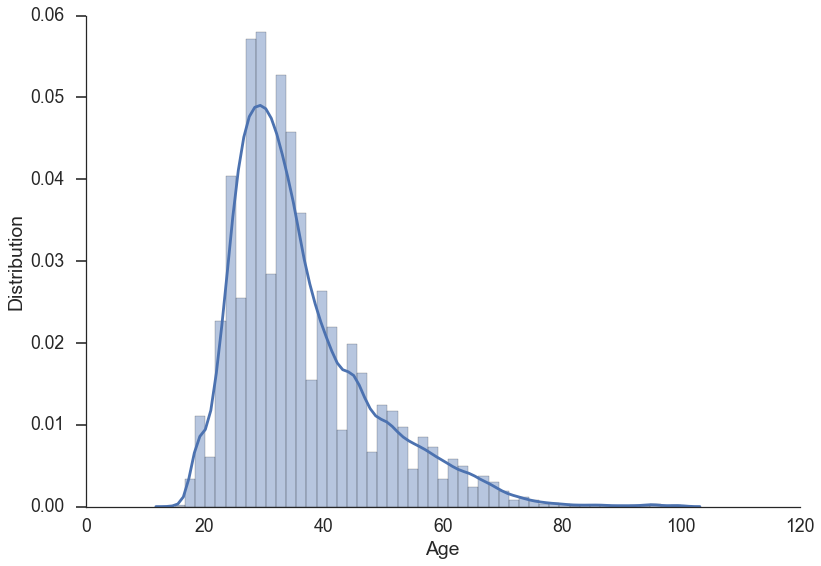

In [13]:
sns.distplot(users.age.dropna())
plt.xlabel('Age')
plt.ylabel('Distribution')
sns.despine()

#### Date Account Created, Timestamp First Active

We used this date column and split it into `dac_y`, `dac_m`, `dac_d`, `dac_wn` (week number), `dac_w_{}` (weekday, it was further split into each day).

Similar treatment was given to the Timestamp First Active with new columns added as `tfa_y`, `tfa_m`, `tfa_d`, `tfa_h` (hour), `tfa_wn` (week number), `tfa_w_{}` (weekday, it was further split into each day).

#### Season (engineered feature)

Using our studied domain knowledge, we know that season of booking can affect the destination choices. For example, people tend to visit cold places or beaches in summer, while the opposite is true in winter.

We added two new features `season_dac` and `season_tfa`.

#### OHE other features

Other categorical features had to be further one hot encoded. `['gender', 'signup_method', 'signup_flow', 'language', 'affiliate_channel', 'affiliate_provider', 'first_affiliate_tracked', 'signup_app', 'first_device_type', 'first_browser']` were encoded.

We ended up with `198` columns after data preprocessing.



### Implementation

#### Random Forest

I used sklearns RandomForestClassifier along with Grid Search for cross validation. The parameters used for GridSearch were, `min_samples_split` over `2,20` and `max_depth` over `6,8`. The best estimator over the training dataset was found to be having `min_samples_split = 2` and `max_depth` was found to be `None`. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.

This model was used to predict the test dataset and uploaded to Kaggle. It got the following scores:
- Validation Score: 0.81756
- Public Leaderboard score of 0.85407
- Private Leaderboard 0.85702

Hence, we can see that RandomForest is able to achieve a slightly better score than our benchmark model on Kaggle as well as on validation.

#### XGBoost

I tried to train XGBoost over the entire feature set of 198 columns but due to limited memory of 8 GB and low computational resources, training had to be stopped on my machine as it took more than an hour. Training was stopped around the 60 minute mark and it was decided to use the feature importances given by the model trained on a subset of the dataset. 

The data was then trained over `[10,20,30,40]` top features and the maximum validation score was achieved for top 30 features. They were:

```['age_interv_5',
 'first_device_type_iPad',
 'language_es',
 'season_dac',
 'signup_flow_1',
 'first_device_type_Android Tablet',
 'age_interv_20',
 'gender_FEMALE',
 'affiliate_provider_google',
 'affiliate_channel_sem-non-brand',
 'tfa_y',
 'tfa_w_5',
 'first_browser_Firefox',
 'signup_method_facebook',
 'signup_method_basic',
 'affiliate_channel_content',
 'dac_m',
 'signup_flow_0',
 'first_device_type_Other/Unknown',
 'first_affiliate_tracked_untracked',
 'gender_-1',
 'first_device_type_Mac Desktop',
 'tfa_d',
 'signup_flow_3',
 'dac_d',
 'tfa_h',
 'tfa_wn',
 'dac_y',
 'age',
 'dac_wn']```

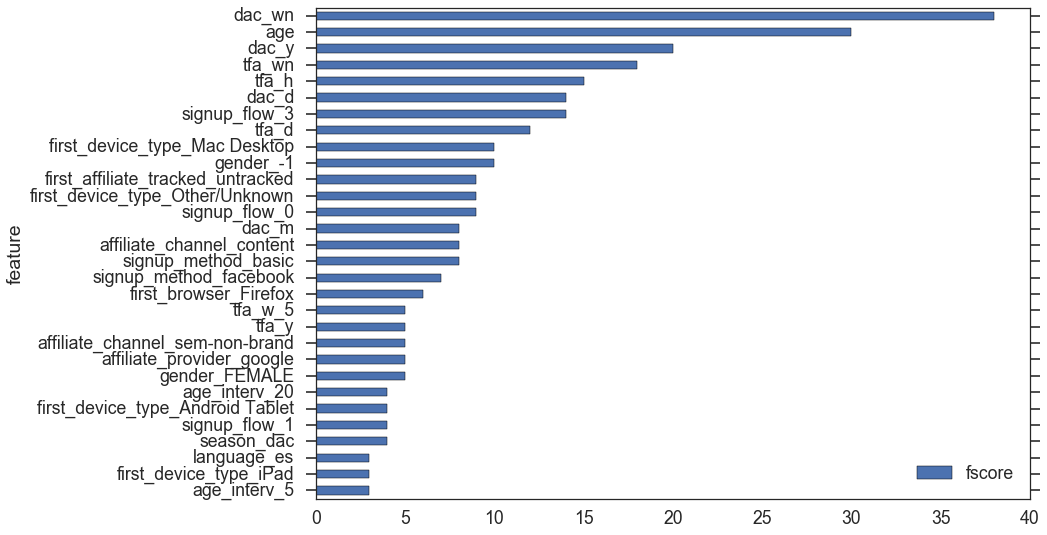

In [26]:
# Plot feature importance of top 30
importance_df.iloc[-30:,:].plot(x='feature',y='fscore',kind='barh')

Afterwards, these top 30 features were trained on an XGBoost classifier again over the entire training set with the following parameters:

```
params = {'eta': 0.2,
          'max_depth': 6,
          'subsample': 0.5,
          'colsample_bytree': 0.5,
          'objective': 'multi:softprob',
          'num_class': 12}
          
```

Here, 
- `eta` is the step size shrinkage which is used to prevent overfitting. The default value is 0.3 and we reduced it to make the boosting process more conservative.

- `max_depth` was kept to the default 6. Increasing the max depth was found to increase the training time. The documentation points out that increasing max_depth would increase the complexity and thereby also overfit it.

- `subsample` was set to 0.5 making XGBoost randomly collect half of the data instances to grow trees and this prevents overfitting.

- `colsample_bytree` is the subsample ratio of columns when constructing each tree.

- `objective` was set as `multi:softprob`. I considered `multi:softmax`, `rank:pairwise` as well. Softprob was the most likely candidate from the [documentation](https://github.com/dmlc/xgboost/blob/master/doc/parameter.md#learning-task-parameters). Afterwards, training with `rank:pairwise` improved the result highly.

- `num_class` is the number of classes to predict.


This XGBoost model got the following scores:
- Validation Score of 0.81616
- Public Leaderboard score of 0.86247
- Private Leaderboard 0.86769

This was more than our benchmark as well our test with RandomForest, hence feature selection seems to be showing a good improvement. This puts us on rank 969 on the private leaderboard.

Finally, after playing with hyperparameter tuning, I decided to read what was used by other competitors. Most competitors utilized hyperparameters that required training for more than 4-5 hours. Given, the limited computational resources with me, I then looked at users with bronze ratings and found a few. I tried the following parameters:

```
        {
        max_depth=7,
        learning_rate=0.18,
        n_estimators=80,
        objective="rank:pairwise",
        gamma=0,
        min_child_weight=1,
        max_delta_step=0,
        subsample=1,
        colsample_bytree=1,
        colsample_bylevel=1,
        reg_alpha=0,
        reg_lambda=1,
        scale_pos_weight=1,
        base_score=0.5,
        missing=None,
        silent=True,
        nthread=-1,
        seed=42
        }
```

This model achieved:
- Validation Score of 0.82352
- Public Leaderboard score of 0.86418
- Private Leaderboard 0.86911

This was more than our previous tests and highest infact, `rank:pairwaise` was concluded to be a good objective for XGBoost. This put us on rank 350 on the private leaderboard.

## IV. Results

### Model Evaluation and Validation

Below we can see the final NDCG scores of our models on Kaggle. We were able to get a maximum score of `0.86911` which puts us in the rank 350. Although, since we reduced our feature dimension, it is expected that training on the full dataset would result in much better scores that would be in the *Silver to Bronze* range in the competition, i.e `< 140` rank. 

Since, our goal was to implement a valid solution and not a competitive one, we have performed reasonably okay given the little computational resources at our side. 

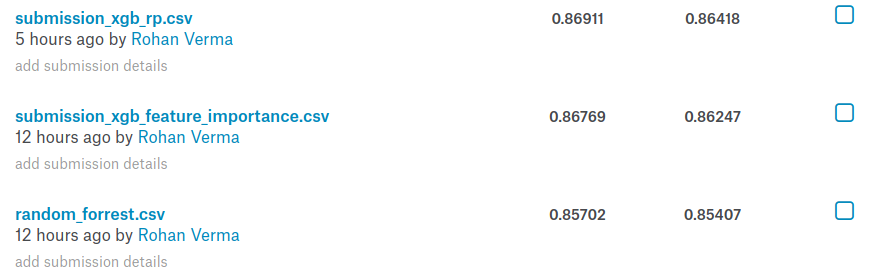

In [4]:
from IPython.display import Image
Image(filename='kaggle_scores.png') 

### Justification

One of the important points to discus about a trained machine learning algorithm is whether it will scale, will it be feasible in the scenario and performance should be consistent with varied data. We can then say whether the model is **robust** or not.
The model, although trained with a reduced feature space, gives a better result with the private subset of the the training set as can be seen by the results on Kaggle. Also, the training and prediction times were very less due to the feature space reduction step and the NDCG score was also good enough. Depending on the scale of the deployment, the parameters and the number of features can be scaled as well. Hence, the model seems to be robust. Alongside this, the model seems to be trustable and aligns well with our expected solutions outcomes.

## V. Conclusion

##### Summary

We have completed the project by designing a model with `rank:pairwise` as the objective with XGBoost. The model has been trained on the training dataset and gives a decent result for both the validation score on a subset of the training set and score on kaggle. The dataset was cleaned, features were added and one hot encoded to finally transform it into 198 features. Out of these 198 features our final model was trained on the top 30 features given by an XGBoost model trained with the default hyperparameters on a validation set. The model places around the 350th position on the private leaderboard with a score of 0.86911. The highest score is 0.88697 and is just 0.01786 less than this. Hence, our final model seems to be a decent model for this problem.

##### Learnings

I learnt how to make sense of dataset provided using visualizations. Cleaning datasets and modifying columns according to the needs of the model by One Hot Encoding and reducing feature space was a skill I learnt effectively. Using GridSearchCV for hyperparameter tuning of the RandomForest classifier. Finally, one of the most important thing I understood was the usage of the XGBoost algorithm and its hyperparameters that will help me in the future to compete in Kaggle competitions and in my future worklpace.

##### Limitations

Computational power was a major limitation for me. The training was done on an Asus K53SV laptop with 8 GB Ram and a Core i5 processor. The training time for these models was in the range of a few minutes after feature space reduction. Therefore, iterating over various hyper parameters took a lot of time. The Jupyter notebook would be responsive at times and required me to pickle the processed dataset so as to not lose a lot of time. Given more computational power, more parameters and tuning can be performed. 


##### Free Form Visualization

The following plot shows the prediction distribution of our final model:

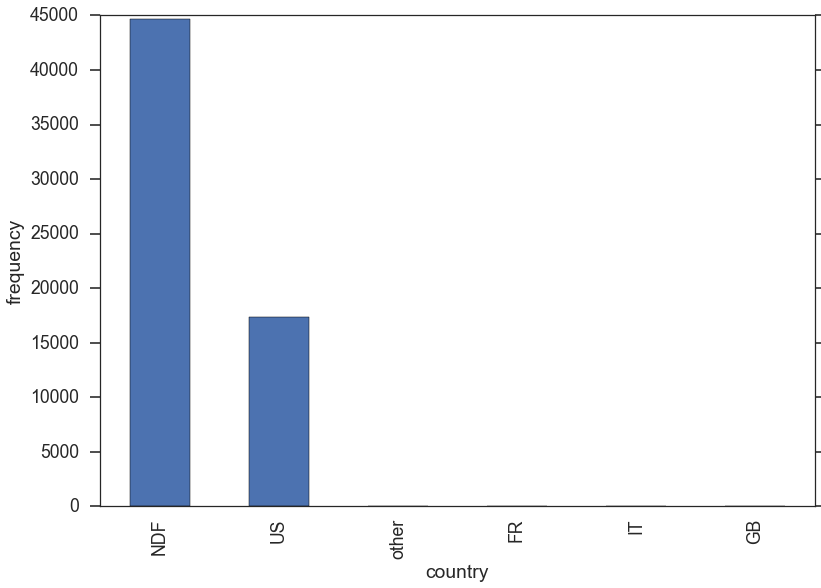

In [99]:
sub.country.value_counts().plot(kind='bar')

An important point to note from this observation above is that users tend to not book as their first choice. Airbnb can thereby push users to book destinations. Also, since, all the users were US Citizens, we can see that most users booked to destinations inside the US itself. A good marketing strategy would be to thereby push customers via discounts etc to book inside the US.

Also, training the users who booked inside the US for the cities they booked could prove highly beneficial for Airbnb.

##### Future Improvements 

The model can thereby be improved by trying the following as studied from successful Kaggle competitors code:

- Training on the full feature space

- Engineering features from the `sessions` file. We could not implement this due to our low RAM space on our machine. Although, such features would increase the dimension of the feature space. We found that after simply one hot encoding without engineering any features the columns are increased to `>300` as found by studying competitors notebooks.

- Studying further underlying relationships between the columns other than the Feature Score to reduce the feature space.

- Engineering features using Unsupervised clustering of the dataset.
